## <center> About Waze </center>

##### Waze is an app that provides satellite navigation software on smartphones and other computers that support the Global Positioning System (GPS). Waze's free navigation app makes it easier for drivers around the world to get to where they want to go. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer

## <center>   Project Goal  </center>

#### The final goal of this project is to develop a ML model to predict which users are most likely to stop using Waze app. This information will allow to make further decisions that will help prevent churn, improve user retention, and thus, grow Waze's business.

## <center> Churn problem </center>
#### Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. 

## <center> Main parts of this project include following steps: </center>

1. Gather and import data to Python, then inspect it in general perspective 
2. Cleaning and pre-processing data to prepare it for further analysis
3. perform EDA to understand data structure
4. Calculate descriptive statistics for quantitative variables, conduct a statistical hypothesis tests for insights
5. Build and evaluate a logistic regression model to predict outcomes  
6. Perform feature engineering and build more complex models e.g. Random forest and XGBoost

## <center>  1. Gather and import data to Python, then inspect it in general perspective   </center>

#### This will include:
- x

We import necessary libraries i.e. pandas and numpy

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

And we load our dataset into dataFrame using standard **pandas.read_csv()** function

In [153]:
df_waze_0 = pd.read_csv("C:/Coursera/Google Advanced Data Analytics/GADA_datasets/waze_dataset.csv")

#### Except data itself, we also got provided a brief description of each column in our dataset:

- ID - A sequential numbered index
- label - Target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 
- sessions - The number of occurrence of a user opening the app during the month
- drives - An occurrence of driving at least 1 km during the month
- device - The type of device a user starts a session with
- total_sessions - A model estimate of the total number of sessions since a user has onboarded
- n_days_after_onboarding - The number of days since a user signed up for the app
-  total_navigations_fav1 - Total navigations since onboarding to the user’s favorite place 1
- total_navigations_fav2 - Total navigations since onboarding to the user’s favorite place 2
- driven_km_drives - Total kilometers driven during the month
- duration_minutes_drives - Total duration driven in minutes during the month
- activity_days - Number of days the user opens the app during the month 
- driving_days - Number of days the user drives (at least 1 km) during the month

As a next step, we will view and inspect summary information of our dataset by using following methods and attributes from pandas module:

- head()
- info()
- shape

In [154]:
df_waze_0.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [155]:
df_waze_0.shape

(14999, 13)

In [156]:
df_waze_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


As we can see above, the variables `label` and `device` are of type `object` (`string`); `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`. There are 14,999 rows and 13 columns.

Above, with usage of **info()** method, we also got number of non-null values per each column. Below we provide the same information from another perspective - how many times per each column, null value occurs. To do so, we will use **isnull()** and **sum()** methods from *pandas* module.

In [157]:
df_waze_0.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

We observe that the only null values in our dataframe are contained in `label` column, there are 700 of them

We will split out dataset for two parts: one where `label` is not null, and another where there are null values in `label` column. Next we will look if there are any differencies in distributions of another variables based on whether `label` columns is null or not

In [158]:
df_waze_not_null = df_waze_0[~df_waze_0["label"].isna()]
df_waze_null = df_waze_0[df_waze_0["label"].isna()]

In [159]:
print(df_waze_not_null.shape)
print(df_waze_null.shape)

(14299, 13)
(700, 13)


For quantitative variables, we will use **describe()** method to calculate summary statistics of each variable:

In [160]:
df_waze_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [161]:
df_waze_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


Comparison of observation where `label` value is missing with those that are not missing didn't reveal anything noteworthy. By this, we mean that means and standard deviations are very consistent across both groups.

For qualitative variable `device` - we will calculate distributions for both group by using **value_counts()** method from *pandas*.

In [162]:
print(df_waze_not_null['device'].value_counts())
print(df_waze_not_null['device'].value_counts(normalize = True))

device
iPhone     9225
Android    5074
Name: count, dtype: int64
device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64


In [163]:
print(df_waze_null['device'].value_counts())
print(df_waze_null['device'].value_counts(normalize = True))

device
iPhone     447
Android    253
Name: count, dtype: int64
device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64


Also there, we see that there is nothing unusual in those distributions. Both are very similar.

There is nothing to suggest a non-random cause of the missing data in our dataset.

In next step, we want to check for distribution in our target variable - `label`. We will use a **value_counts()** method again, once for numbers, and once for percentages, with parameter *normalize = True*.

In [164]:
print(df_waze_0["label"].value_counts())
print(df_waze_0["label"].value_counts(normalize = True))

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


Our dataset contains over 80% of retained users.

Next, we will look for median values of numerical variables for retained and churned users of Waze app. We use median instead of mean because it is resistant for outliers. We will use **groupby()** and **median()** methods from *pandas* module. 

In [165]:
df_waze_0.groupby("label").median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This comparison offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged about 3 more drives per month, but they got an over 2 times lower activity on app, counted in days. They also have more than 2 times less driving days throughout whole month than retained users. However, despite this fact, churned users drived more kms. It seems that users who left the app were doing longer drives in shorter period of time. To confirm this, we will create another column `km_driven_per_drive` which will help us calculate median kilometers per drive in the last month for both retained and churned users.

In [166]:
df_waze_0["km_driven_per_drive"] = df_waze_0["driven_km_drives"] / df_waze_0["drives"]

As we divide by `drives` column, we want to check whether this column contains some zeros, and therefore whether our new created column contains some infinity values (np.inf).

In [167]:
df_waze_0[ df_waze_0["km_driven_per_drive"] == np.inf ]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive
25,25,retained,0,0,139.194969,2731,13,4,5702.339466,4582.737478,6,2,Android,inf
97,97,retained,0,0,559.547112,2879,0,0,6668.844350,3511.370419,28,24,Android,inf
217,217,retained,0,0,33.710210,629,160,0,6103.881670,1767.846528,8,2,iPhone,inf
339,339,retained,0,0,0.220211,347,130,0,2520.850896,1539.318152,20,15,iPhone,inf
485,485,NaN,0,0,90.747466,579,229,0,1363.206140,66.588493,15,11,iPhone,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14411,14411,retained,0,0,472.078785,1746,126,0,3148.136679,1685.365455,20,18,Android,inf
14549,14549,retained,0,0,96.781778,2732,425,16,1394.604767,573.591169,18,10,iPhone,inf
14562,14562,retained,0,0,20.067490,1355,83,98,1805.177261,271.398262,23,17,iPhone,inf
14668,14668,retained,0,0,5.626862,592,0,0,7959.247975,869.674910,13,9,Android,inf


As we see above, there are 106 np.inf values for our new column. We dont want them, so we assign those obsevations manually with zero value.

In [168]:
df_waze_0["km_driven_per_drive"] = df_waze_0["km_driven_per_drive"].replace(np.inf, 0)

In [169]:
df_waze_0[ df_waze_0["km_driven_per_drive"] == np.inf ]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive


As we checked above, our operation was succeed. We can now calculate median values.

In [170]:
df_waze_0[["km_driven_per_drive", "label"]].groupby("label").median()

,km_driven_per_drive
label,
churned,72.771939
retained,73.006576


The users who are more loyal to our app have averaged almost one more km per drive than churned users.

We will also try the same thing, just investigating number of kms per driving days instead of particular drives.

In [171]:
df_waze_0["km_driven_per_driving_day"] = df_waze_0["driven_km_drives"] / df_waze_0["driving_days"]

In [172]:
df_waze_0["km_driven_per_driving_day"] = df_waze_0["km_driven_per_driving_day"].replace(np.inf, 0)

In [173]:
df_waze_0[["km_driven_per_driving_day", "label"]].groupby("label").median()

,km_driven_per_driving_day
label,
churned,407.597934
retained,256.056187


We also check the ratio of amount of drives for each driving day for our studied groups:

In [174]:
df_waze_0["drives_per_driving_day"] = df_waze_0["drives"] / df_waze_0["driving_days"]
df_waze_0["drives_per_driving_day"] = df_waze_0["drives_per_driving_day"].replace(np.inf, 0)
df_waze_0[["drives_per_driving_day", "label"]].groupby("label").median()

,drives_per_driving_day
label,
churned,5.500000
retained,3.470588


The median user who churned drove 698 kilometers each day. They drove last month almost 2.5 times(!) more than retained users per driving day. What's more, we see that those users also have more drives per each day, with very similar proportion (240%-250% more) comparing to retained users group. 
<br>
It is more than clear that all users, no matter whether they churned or not, are driving a lot. With almost 300kms and 700kms per each group, it is safe to assume that those numbers does not represent casual drivers. It is really likely that our dataset represents some kind of proffesional drivers. It would be good idea to recommend gather more data on those super drivers. Maybe the reason why they drive so much is also the reason why they leave our app more often, because it does not meet their specific needs which could differ from more casual drivers. 

Also, we want to check whether there is any relationship between churn and our only qualitative explanatory variable.

In [175]:
df_waze_0.groupby("label")["device"].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

In [176]:
df_waze_0.groupby("label")["device"].value_counts(normalize = True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The ratio between iPhone and Android users is very consistent between churned group and those who retained with our app.

## <center>  2. Cleaning and pre-processing data to prepare it for further analysis   </center>


Given our scenario, we will choose which columns are most applicable. Since we are interested in user churn, the `label` column is necessary. Beside that, we will recognize all columns related to any kind of user behavior as applicable to our task. The only column that does not provide useful information is `ID` as we do not want to identificate particular users. Therefore, we will drop this column.

In [177]:
df_waze_0 = df_waze_0.drop("ID", axis = 1)

In [178]:
df_waze_0.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


Next step will include handling with outliers. To identify them, we will use mean and median values as well as boxplots which will provide us visual representation of potential outliers. 

In [179]:
df_waze_0.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14992.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,232.817946,578.963113,9.387368
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,620.622351,1030.094384,19.826097
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,32.424301,136.238895,1.250000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,72.854343,272.889272,3.666667
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,179.347527,558.686918,9.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15777.426560,15420.234110,395.000000


In seaborn library, there is an option to turn on another theme by **sns.set()** instruction. It is different from default matplotlib.pyplot theme, if we wanted to return to this default option, we should execute **sns.reset_orig()** command.

In [180]:
sns.set()
#sns.reset_orig()

In [181]:
# example plot

# fig, ax = plt.subplots(figsize = (6,1.5))
# sns.boxplot(x = df_waze_0["sessions"], ax = ax)
# plt.show()

In [182]:
# function for plotting boxplot in plt

# def boxplot_plt(col_arg, figsize_arg = None):
#    # fig, ax = plt.subplots(figsize = (6,1.5))

#     if figsize_arg == None:
#         fig, ax = plt.subplots()
#     else:
#         fig, ax = plt.subplots(figsize = figsize_arg)
#     ax = plt.boxplot( col_arg, orientation = 'horizontal', widths = 0.5)
#     plt.show()

# boxplot_plt( col_arg = df_waze_0["sessions"], figsize_arg = (6,2))

## Analysis of boxplots

Below, we define our custom function to plot a boxplot for certain numerical variable given by user. User can also modify size of plotted figure by entering a two-value tuple as a second argument.

In [183]:
import pandas.api.types as ptypes

In [184]:
def boxplot_sns(df_name_arg, col_arg, figsize_arg = None, **kwargs):   # **kwargs = any keyword arguments for sns.boxtplot() function

    if not isinstance(df_name_arg, pd.DataFrame):
        print("Please enter dataframe as first argument!")
        return

    if col_arg not in df_name_arg.columns:
        print("Please enter valid column name!")
        return
    
    if not ptypes.is_numeric_dtype(df_name_arg[col_arg]) :
        print("Please enter numeric column as second argument!")
        return   # end function

    if not (isinstance(figsize_arg, tuple) or isinstance(figsize_arg, list)):
        print("Please enter tuple or list as third argument!")
        return

    if not len(figsize_arg) == 2:
        print("Your given tuple or list for size of figure  should contain 2 numeric values!")
        return
    
    if figsize_arg is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots( figsize = figsize_arg )
    
    sns.boxplot(x = df_name_arg[col_arg], ax = ax, **kwargs)    
    plt.show()
    # fig, ax = plt.subplots
    # sns.boxplot(x = df_waze_0["sessions"], ax = ax)
    # plt.show()

We get a list of all numerical variables included in our dataset:

In [185]:
df_waze_0["sessions"].count() // 300

np.int64(49)

In [186]:
num_cols = df_waze_0.select_dtypes(include=['number']).columns.tolist()

Now we execute our **boxplot_sns()** function to each of numerical column contained in a list above:

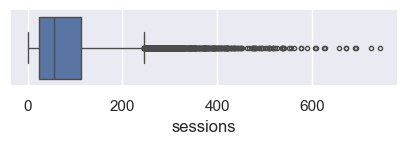

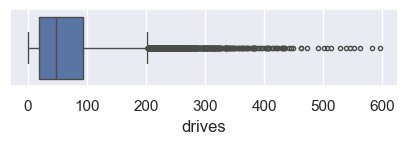

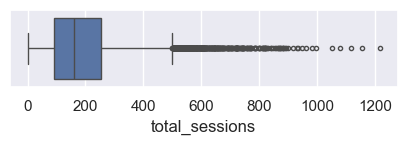

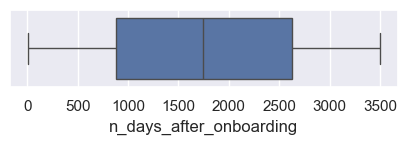

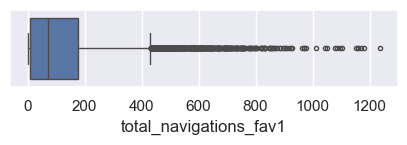

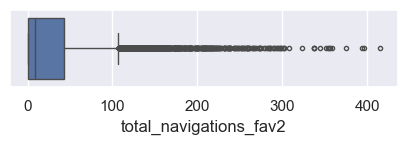

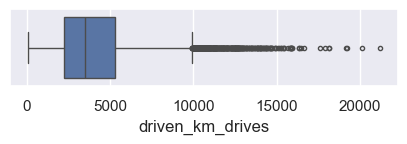

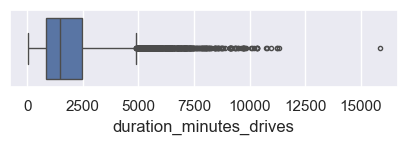

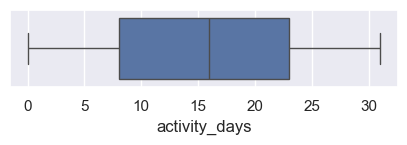

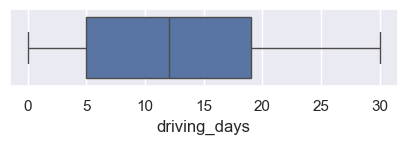

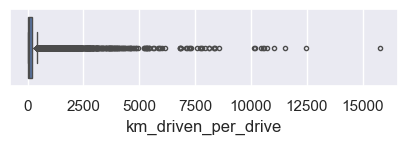

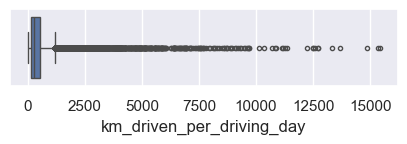

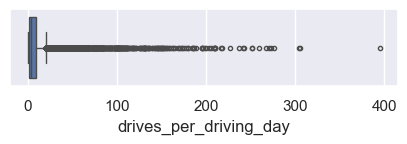

In [187]:
for col in num_cols:
    boxplot_sns( df_waze_0, col, (5, 1), fliersize = 3)

Let's remind, in boxplot chart outliers are being shown as points reaching over "Minimum" and "Maximum". Values of those "Minimum" and "Maximum" are Q1-1.5\*IQR and Q3+1.5\*IQR respectively. Obviously, there could be situation, where no single value could be classified as an outlier, if that is the case, no points behind whiskers are visualized.
<br>
However, in most of our numeric columns, there are values that we can identify as outliers. Only `n_days_after_onboarding`,`activity_days` and `driving_days`don't have any outliers. In all other numeric columns we have some outliers, in all of them they are bigger than our "Maximum", which tells us that distributions of those variables are right-skewed. We will look for confirmation of this fact by creating histplots of our numeric columns.

## Analysis of histplots

In [188]:
def histplot_sns(df_name_arg, col_arg, figsize_arg = None, bins_arg = None, median_text_arg = True, **kwargs):    # **kwargs = any keyword arguments for sns.histplot() function

# -------------  validation of values enter by user ----------------
    if not isinstance(df_name_arg, pd.DataFrame):
        print("Please enter dataframe as first argument!")
        return

    if col_arg not in df_name_arg.columns:
        print("Please enter valid column name!")
        return

    if not ptypes.is_numeric_dtype(df_name_arg[col_arg]) :
        print("Please enter numeric column as second argument!")
        return   # end function

    if not (isinstance(figsize_arg, tuple) or isinstance(figsize_arg, list)):
        print("Please enter tuple or list as third argument!")
        return

    if not len(figsize_arg) == 2:
        print("Your given tuple or list for size of figure should contain 2 numeric values!")
        return


#-----------------------------------------------------------
    
    if figsize_arg is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots( figsize = figsize_arg )

    median_value = df_name_arg[col_arg].median().round(decimals = 2)
    if bins_arg != "auto":
         bins_arg = df_name_arg[col_arg].count() // 300
   # print(bins_arg)
    sns.histplot(x = df_name_arg[col_arg], ax = ax, bins = bins_arg, **kwargs)  
    
    ax.axvline(x=median_value, color='r', linestyle='--', linewidth=1.5)

    if median_text_arg:
        ax.text(0.25, 0.85, f'median={median_value}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median for {} column:'.format(col_arg), median_value)
    
    ax.set_title("{} - histogram".format(col_arg))
    plt.show()


### `sessions`

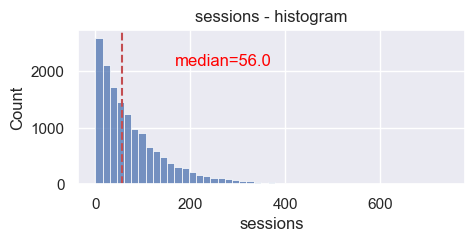

In [189]:
histplot_sns(df_waze_0, "sessions", (5,2))

The distibutions of a `sessions` variable is strictly right-skewed. Most of users open app few times, with half of the users open app 56 or less times. But, as indicated previously in boxplot, there are users who have opened Waze app even +700 times during this month.

### `drives`

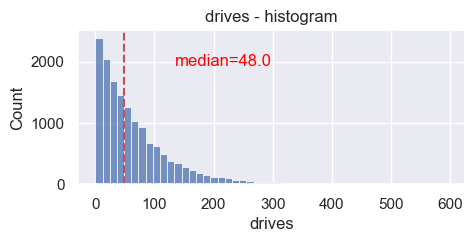

In [190]:
histplot_sns(df_waze_0, "drives", (5,2))

We see that distribution of `drives` is also strictly right-skewed with most of users having few drives during month, but on the other hand there are users who drove a few houndred times, some of them got almost 600 drives during this month.

### `total_sessions`

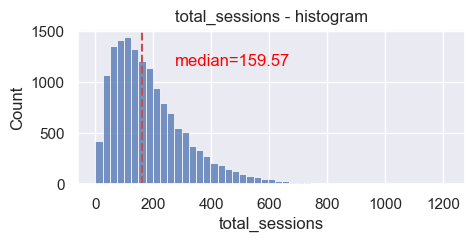

In [191]:
histplot_sns(df_waze_0, "total_sessions", (5,2))

Distribution of `total_sessions` is also right-skewed, but most of users have total number of sessions between 50 and 130. However, half of observations have values bigger than 160 with few values even bigger than 1000.

### `n_days_after_onboarding`

Median for n_days_after_onboarding column: 1741.0


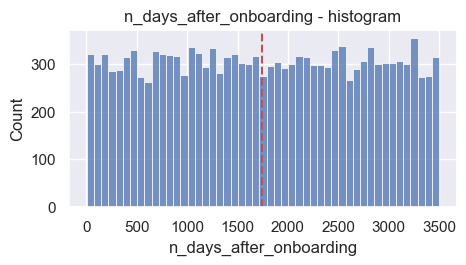

In [192]:
histplot_sns(df_waze_0, "n_days_after_onboarding", (5, 2.3), median_text_arg = False)

As we can see above, `n_days_after_onboarding` values are uniformly distributed between 0 and 3500, with median value equal to approximately 1700.

### `driven_km_drives`

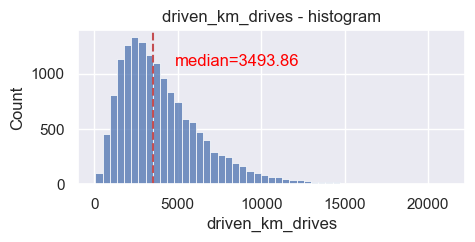

In [193]:
histplot_sns(df_waze_0, "driven_km_drives", (5,2))

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As we discovered in the analysis before, the users in this dataset drive a lot.  The longest distance driven in the month was over half the circumferene of the earth. (20 000+ kms)

### `duration_minutes_drives`

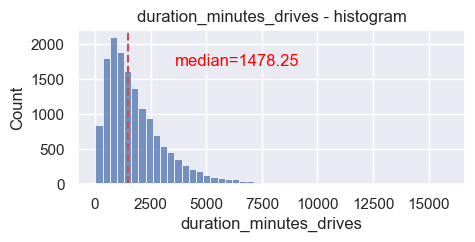

In [194]:
histplot_sns(df_waze_0, "duration_minutes_drives", (5,2))

Duration of drives per user is also right-skewed with 50% of population driving less than 1480 minutes which is a little more than 1 day. However, there are users that drove even more than 15000 minutes (more than 10 days) during last month, which also indicates that they are really serious drivers. 

### `activity_days`

Median for activity_days column: 16.0


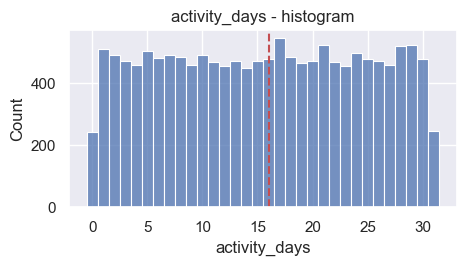

In [195]:
histplot_sns(df_waze_0, "activity_days", (5, 2.3), median_text_arg = False, discrete = True)

Number of activity days per user is uniformly distributed with ~500 count for all values between 1 and 30, but we observe significantly lower values for users with least activity with 0 days and most with 31 days, there are only ~250 of them. It is also worth to note that distribution of `activity_days` is not highly corelated with `sessions` which could be a guess. In particular, `sessions` variable had strictly right-skewed distribution.

### `driving_days`

Median for driving_days column: 12.0


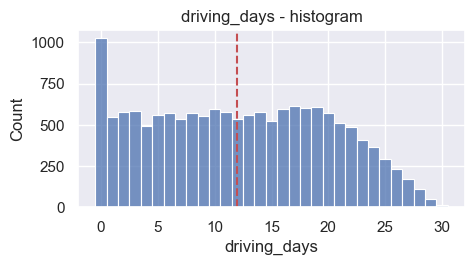

In [196]:
histplot_sns(df_waze_0, "driving_days", (5, 2.3), median_text_arg = False, discrete = True)

When it comes to driving days, the biggest number of users have not drived at all this month - there are around 1000 them. Whatsmore, thre are ~500 users that are driving for each number of days between 1 and 20. Less users were driving for more than 20 days - distribution between 20 and 30 becomes right-skewed with fewest users that drived in each day of this month.

## Analysis of quantiles

For further analysis of outliers, we will add some quantile values to our analysis. To do so, we will use **quantile()** method, quantiles of 0.75, 0.9, 0.95 and 1 (Maximum) will be calculated.

In [197]:
df_waze_0.quantile([0.75, 0.9, 0.95, 1], numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
0.75,112.0,93.0,254.192341,2623.5,178.0,43.0,5289.861262,2464.362632,23.0,19.0,179.347527,558.686918,9.0
0.90,185.0,153.0,370.157341,3149.2,319.0,88.0,7411.759562,3737.615212,28.0,23.0,492.750391,1295.664093,21.0
0.95,243.0,201.0,454.363204,3314.0,424.0,124.0,8889.794236,4668.899349,29.0,25.0,908.458891,2237.150623,37.0
1.00,743.0,596.0,1216.154633,3500.0,1236.0,415.0,21183.401890,15851.727160,31.0,30.0,15777.426560,15420.234110,395.0


For `n_days_after_onboarding`, `activity_days` and `driving_days` columns, for which we did not identify outlierss in boxplot and histplots, we see relatively small differences between 95% quantile and maximum value. All other considered numeric variables have big, meaningful difference between maximum and 95% quantile. We decide to cut all values bigger than 95% quantile and assign this threshold value for them. We will repeat this procedure for each of those columns.

In [198]:
num_cols_to_cut = (
    df_waze_0
    .select_dtypes(include=['number'])
    .drop(["n_days_after_onboarding", "activity_days", "driving_days"], axis=1)
    .columns
)

In [199]:
df_waze_0["sessions"].median()

np.float64(56.0)

In [200]:
def outlier_handler(df_arg, col_arg, percentile_arg):
    # Calculate threshold
    threshold = df_arg[col_arg].quantile(percentile_arg)
    # Impute threshold for values > than threshold
    df_arg.loc[df_arg[col_arg] > threshold, col_arg] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(col_arg, percentile_arg, threshold))

In [201]:
for c in num_cols_to_cut:
    outlier_handler(df_waze_0, c, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
   total_navigations_fav1 | percentile: 0.95 | threshold: 424.0
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998
      km_driven_per_drive | percentile: 0.95 | threshold: 908.4588914
km_driven_per_driving_day | percentile: 0.95 | threshold: 2237.1506231
   drives_per_driving_day | percentile: 0.95 | threshold: 37.0


Check if our operation was success by comparing 95% quantile and maximum values of selected columns, they should be equal.

In [205]:
df_waze_0.quantile([0.95, 1], numeric_only = True)[num_cols_to_cut]

,sessions,drives,total_sessions,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
0.95,243.0,201.0,454.343512,424.0,124.0,8889.777661,4668.821721,908.455073,2237.138455,37.0
1.00,243.0,201.0,454.363204,424.0,124.0,8889.794236,4668.899349,908.458891,2237.150623,37.0


`device` column

In [ ]:
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

In [215]:
counts

device
iPhone     9672
Android    5327
Name: count, dtype: int64

In [223]:
for index, val in counts.items():
    print(index)
    print(val)

iPhone
9672
Android
5327


In [225]:
["{}: {}".format(index, val) for index, val in counts.items()]

['iPhone: 9672', 'Android: 5327']

In [224]:
[f'{counts.index[0]}: {counts.values[0]}',
                f'{counts.index[1]}: {counts.values[1]}']

['iPhone: 9672', 'Android: 5327']

In [226]:
def plt_piechart(df_arg, col_arg, figsize = ):

SyntaxError: incomplete input (3630188206.py, line 1)

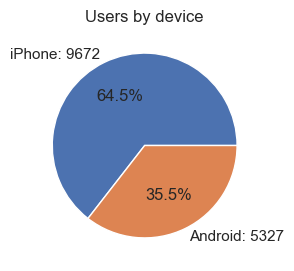

In [213]:
fig, ax = plt.subplots(figsize=(3,3))
counts = df_waze_0["device"].value_counts()

ax.pie(counts,
        labels=[f'{counts.index[0]}: {counts.values[0]}',
                f'{counts.index[1]}: {counts.values[1]}'],
        autopct='%1.1f%%'
        )
ax.set_title("Users by device")
plt.show()

In [208]:
counts

device
iPhone     9672
Android    5327
Name: count, dtype: int64